## **1. IMPORTING LIBRARIES**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## **2. LOADING DATASET**

In [5]:
df = pd.read_csv('train.csv')  # assuming you're using the training dataset


## **3. UNDERSTANDING AND EXPLORING DATASET**

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## **4. DATA CLEANING**

#### **4.1 Fill missing age with median**

In [12]:
df['Age'] = df['Age'].fillna(df['Age'].median())


#### **4.2 Fill embarked with most frequent value**

In [14]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

#### **4.3 Drop the 'Cabin' column due to too many missing values**

In [16]:
df = df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'])


#### **4.4 Convert 'Sex' and 'Embarked' to numeric using one-hot encoding**

In [18]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

## **5. FEATURE SELECTION AND TARGET VARIABLE**

In [31]:
X = df.drop('Survived', axis=1)
y = df['Survived']


## **6. SPLIT THE DATA**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **7. TRAIN THE MODEL**

In [37]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## **8. EVALUATE THE MODEL**

In [41]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8212290502793296
[[91 14]
 [18 56]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## **9. FEATURE IMPORTANCE (Factors Leading to Survival)**

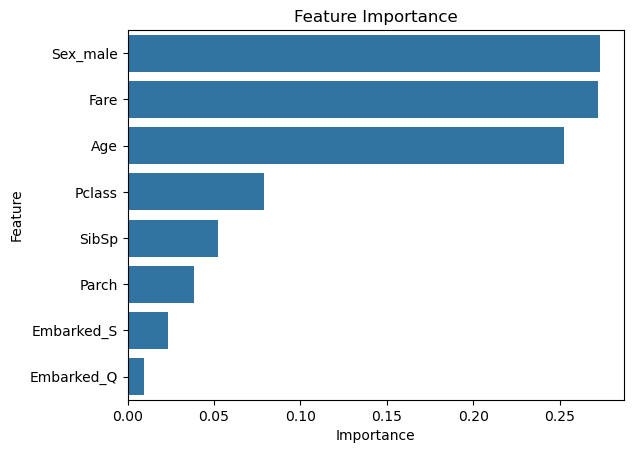

In [43]:
importances = model.feature_importances_
features = X.columns

feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)

sns.barplot(data=feature_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()


## **CONCLUSION**


#####  **>>> Sex**:     Females had higher survival rates.

##### **>>> Pclass**:   1st class passengers were more likely to survive (socio-economic status).

##### **>>> Age**:      Children had a slightly higher chance.

##### **>>> Fare**:     Higher fare could correlate with better accommodation/class.

##### **>>> Embarked**: Some ports had different outcomes.